# Rotation representations

The orientation of an object in 3D space can be described by a set of three values: $(\alpha, \beta, \gamma)$, where $\alpha$ is roll, $\beta$ is pitch, and $\gamma$ is yaw. 

<figure>
  <div style="text-align:center;">
  <figcaption>Roll, pitch, and yaw</figcaption>
  <img style='width:500px' src='../assets/_images/roll-pitch-yaw.jpg' />
</figure>


Mathematically, any point $\mathbf{p}$ on an object that undergoes rotation $(\alpha, \beta, \gamma)$ will have a new coordinate $\mathbf{p'}$ calculated as follows:

$$
\mathbf{p'} = R \mathbf{p}
$$

Where:

$$
\begin{align*}
    \mathbf{p'} &= \begin{bmatrix}
  x' \\
  y' \\
  z' \\
    \end{bmatrix} \\
    R &=    
    \begin{bmatrix}
  \cos \gamma & -\sin \gamma & 0 \\
  \sin \gamma & \cos \gamma & 0 \\
  0 & 0 & 1 \\
    \end{bmatrix}
    \begin{bmatrix}
  \cos \beta & 0 & \sin \beta \\
  0 & 1 & 0 \\
  -\sin \beta & 0 & \cos \beta \\
    \end{bmatrix}
    \begin{bmatrix}
  1 & 0 & 0 \\
  0 & \cos \alpha & -\sin \alpha \\
  0 & \sin \alpha & \cos \alpha \\
    \end{bmatrix} \\
    \mathbf{p} &= \begin{bmatrix}
  x \\
  y \\
  z \\
    \end{bmatrix}
\end{align*}
$$

## Gimbal Lock
Ideally, we would hope that the parameters $(\alpha, \beta, \gamma)$ are enough to rotate any point $\mathbf{p}$ (distance $d$ from the origin) to any other point $\mathbf{p'}$ (also distance $d$ from the origin, since rotations do not change distance). Upon closer thought, it would seem as if we have more than enough parameters to do this, since it only takes two parameters $(\theta, \phi)$ to describe all points on the 3D unit sphere

<figure>
  <div style="text-align:center;">
  <figcaption>Two parameters sweeping out a sphere</figcaption>
  <img style='width:250px' src='../assets/_images/3d_unit_sphere.jpg' />
</figure> 

However, this intuition is a bit off. If any one parameter is held fixed, it may be impossible for $\mathbf{p}$ to be rotated to some other $\mathbf{p'}$ by varying the remaining two parameters. Moreover, if a certain parameter is set to a certain problematic value, then varying the remaining two parameters will either sweep out a circle (not a sphere!), or not affect $\mathbf{p}$ at all, depending on what $\mathbf{p}$ is. This result is way different from what we expected! The name for this degenerate case is gimbal lock. 

## Questions


1. Suppose an airplane pitches the nose up to a pitch of $-\pi / 2$ ($90 \degree$ up):

    <figure>
      <div style="text-align:center;">
      <figcaption>Airplane</figcaption>
      <img style='width:250px' src='../assets/_images/airplane_pitch_0.jpg' />
    </figure>

    <figure>
      <div style="text-align:center;">
      <figcaption>Airplane with pitch at 90 degrees up</figcaption>
      <img style='width:250px' src='../assets/_images/airplane_pitch_90.jpg' />
    </figure>

    Let $R_{\text{gim} \beta}$ denote the rotation matrix $R$ for $\beta = -\pi / 2$. Prove that

    $$
    R_{\text{gim} \beta} = 
        \begin{bmatrix}
      0 & -\sin(\alpha+\gamma) & -\cos(\alpha+\gamma) \\
      0 & \cos(\alpha+\gamma) & -\sin(\alpha+\gamma) \\
      1 & 0 & 0
        \end{bmatrix}
    $$ 


1. Consider the point $\mathbf{p} = [0 \quad 1 \quad 0]^T$ on the pitched airplane, i.e. the tip of the wing. Does there exist any $\alpha, \gamma$ such that $\mathbf{p'} = R_{\text{gim} \beta} \mathbf{p}$ for $\mathbf{p'} = [1 \quad 0 \quad 0]^T$?
  
    Show your work and briefly explain your reasoning (1-2 sentences). 


1. Consider the point $\mathbf{p} = [0 \quad 1 \quad 0]^T$ on the pitched airplane, i.e. the tip of the wing:
    Can we set $\alpha, \gamma$ such that:

    $$
    \mathbf{p'} = R_{\text{gim} \beta} \mathbf{p}
    $$

    for some $\mathbf{p'}$ on the XY unit circle (e.g. $[\frac{\sqrt 2}{2} \quad \frac{\sqrt 2}{2} \quad 0]^T$)?
    
    You do not have to show any work, but briefly explain your reasoning (1-2 sentences). 


1. Consider the point $\mathbf{p} = [0 \quad 1 \quad 0]^T$ on the pitched airplane, i.e. the tip of the wing.
    Can we set $\alpha, \gamma$ such that:

    $$
    \mathbf{p'} = R_{\text{gim} \beta} \mathbf{p}
    $$
    
    for some $\mathbf{p'}$ on the YZ unit circle (e.g. $[0 \quad \frac{\sqrt 2}{2} \quad \frac{\sqrt 2}{2}]^T$)?
  
    You do not have to show any work, but briefly explain your reasoning (1-2 sentences). 


Reflect on your answers to the previous 4 questions. What are the questions trying to portray? Why are the answers different? Why is $-\pi / 2$ (i.e. pitched up $90\degree$) a "certain problematic value"? What would happen to an airplane that pitched that much? Could a pilot recover from such a situation? Are 3 parameters enough to allow for rotations in all situations? 


## Visualization

You can use the following program to experiment with the effect of rotation matrices on an airplane shaped cloud of points. Run the code then move the pitch slider to $-90\degree$ to see gimbal lock.

Output()

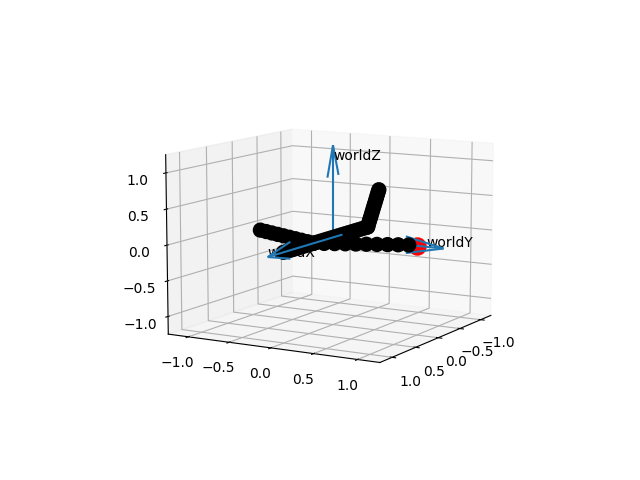

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import  mpl_toolkits.mplot3d.axes3d
import ipywidgets as widgets



def rotate_plane(alpha,beta,gamma):
    alpha=np.deg2rad(alpha) # numpy uses radians, but the sliders use degrees, so convert.
    beta=np.deg2rad(beta)
    gamma=np.deg2rad(gamma)

### you do not need to edit anything above this line ###
    # alpha = roll
    # beta  = pitch
    # gamma = yaw

    RX=np.matrix([[1, 0, 0],[0, np.cos(alpha), -np.sin(alpha)],[0, np.sin(alpha), np.cos(alpha)]])  #x  https://en.wikipedia.org/wiki/Rotation_matrix#Basic_rotations
    RY=np.matrix([[np.cos(beta), 0, np.sin(beta)],[0, 1, 0],[-np.sin(beta), 0, np.cos(beta)]])      #y  https://en.wikipedia.org/wiki/Rotation_matrix#Basic_rotations
    RZ=np.matrix([[np.cos(gamma), -np.sin(gamma), 0],[np.sin(gamma), np.cos(gamma), 0],[0, 0, 1]])  #z  https://en.wikipedia.org/wiki/Rotation_matrix#Basic_rotations

    Rgimb=np.matrix([[0,-np.sin(alpha+gamma),-np.cos(alpha+gamma)],[0,np.cos(alpha+gamma),-np.sin(alpha+gamma)],[1,0,0]]) # not used by default, but you can try it

    airplane_rotated=RZ*RY*RX*airplane_points # rotate points by matrices

#    airplane_rotated=Rgimb*airplane_points

    update_display(airplane_rotated,ax)

### you do not need to edit anything below this line ###



airplane_points=np.array((
np.concatenate((0,np.linspace(1,-.75,25),np.linspace(-.75,-1,15),np.linspace(.4,0,10),np.linspace(.4,0,10)),axis=None), # x
np.concatenate((1,np.linspace(0,0,25),np.linspace(0,0,15),np.linspace(0,.9,10),np.linspace(0,-.9,10)),axis=None),       # y
np.concatenate((0,np.linspace(0,0,25),np.linspace(0,.5,15),np.linspace(0,0,10),np.linspace(0,0,10)),axis=None)          # z
))

def plot_airplane_points(airplane_points,ax):
    ax.scatter(airplane_points[0,1:],airplane_points[1,1:],airplane_points[2,1:], c='black', s=100, alpha=1)
    ax.scatter(airplane_points[0,0],airplane_points[1,0],airplane_points[2,0],c='red', s=150, alpha=1)

def draw_world_axes(ax):
    ax.quiver(-.2,0,0,1.5,0,0) #x
    ax.quiver(0,-.2,0,0,1.5,0) #y
    ax.quiver(0,0,-.2,0,0,1.5) #z
    ax.text(0,0,1.1,'worldZ')
    ax.text(0,1.1,0,'worldY')
    ax.text(1.3,0,0,'worldX')

def update_display(airplane1,ax):
    ax.clear()
    ax.set_xlim3d(-1.2, 1.2)
    ax.set_ylim3d(-1.2, 1.2)
    ax.set_zlim3d(-1.2, 1.2)
    draw_world_axes(ax)
    plot_airplane_points(airplane1,ax)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=10, azim=30)

roll_widget = widgets.FloatSlider(description='roll', min=-180, max=180)
pitch_widget = widgets.FloatSlider(description='pitch', min=-90, max=90)
yaw_widget = widgets.FloatSlider(description='yaw', min=-180, max=180)

ui = widgets.VBox([roll_widget,pitch_widget,yaw_widget])

out = widgets.interactive_output(
    rotate_plane,
    {
        'alpha' : roll_widget,
        'beta' : pitch_widget,
        'gamma' : yaw_widget
    }
    )

display(ui,out)
plt.show()
